In [1]:
from pathlib import Path

from matflow import load_workflow

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from matplotlib import gridspec
from PIL import Image

%matplotlib inline

# Load workflow

In [2]:
# load in x
#workflow = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-06-15-101208')
#workflow = load_workflow('D:/Matflow_exports/RVE_extrusion_2021-06-15-101208')

# load in rotated x +45 degrees soft
#workflow = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-06-15-101303')
#workflow = load_workflow('D:/Matflow_exports/RVE_extrusion_2021-06-15-101303')

# load in rotated x -45 degrees hard
#workflow = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-06-15-101354')
#workflow = load_workflow('D:/Matflow_exports/RVE_extrusion_2021-06-15-101354')

# load in x smaller model 75%
#workflow = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-06-17-132749')

# load in x smaller model 50%
#workflow = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-06-17-144358')

#workflow = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-06-28-110230')


#workflow = load_workflow('C:/Users/mbgm5pc3/Dropbox (The University of Manchester)/matflow_exports/RVE_extrusion_worked/RVE_extrusion_2021-07-14-161029')


# load in x full
#workflow = load_workflow('D:/Matflow_exports/RVE_extrusion_2021-07-18-130258')


# load in rotated x -45 degrees hard full
#workflow = load_workflow('D:/Matflow_exports/RVE_extrusion_2021-07-18-130506')


# load in rotated x +45 degrees soft full
workflow = load_workflow('D:/Matflow_exports/RVE_extrusion_2021-07-18-130721')

                         


sim_task = workflow.tasks.simulate_volume_element_loading
vol_elem_resp = sim_task.elements[0].outputs.volume_element_response

Loading matflow config from C:\Users\mbgm5pc3\.matflow\config.yml
Loading task schemas from 1 file(s)...OK!
Loading software definitions from 1 file(s)...OK!


In [3]:
workflow.tasks

(Task(name='load_microstructure', method='EBSD', software='defdap'), Task(name='generate_volume_element', method='extrusion', software='damask'), Task(name='modify_volume_element', method='add_buffer_zones', software='damask'), Task(name='visualise_volume_element', method='VTK', software='damask'), Task(name='generate_load_case', method='uniaxial', software='formable'), Task(name='simulate_volume_element_loading', method='CP_FFT', software='damask'))

# Plot stress strain curve

In [4]:
#mean_strain = vol_elem_resp['phase_data']['vol_avg_strain']['data']
#mean_stress = vol_elem_resp['phase_data']['vol_avg_stress']['data']

mean_strain = vol_elem_resp['phase_data']['vol_avg_eqv_strain']['data']
mean_stress = vol_elem_resp['phase_data']['vol_avg_eqv_stress']['data']

In [5]:
'''import csv

with open('load_in_45x','w') as f:
    writer = csv.writer(f)
    
    writer.writerow(mean_strain)
    writer.writerow(mean_stress)'''

"import csv\n\nwith open('load_in_45x','w') as f:\n    writer = csv.writer(f)\n    \n    writer.writerow(mean_strain)\n    writer.writerow(mean_stress)"

(0.0, 495.44365108391685)

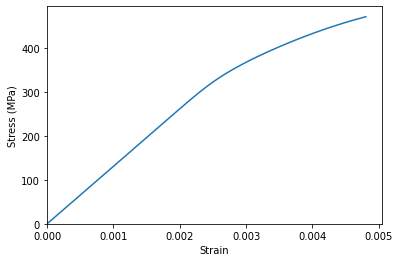

In [6]:
plt.figure()
#plt.plot(mean_strain[:, 0, 0], mean_stress[:, 0, 0]/1e6)
plt.plot(mean_strain, mean_stress/1e6)

plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')
plt.xlim([0, None])
plt.ylim([0, None])

#plt.savefig(r'stress_strain_curve_-45.png')

# Plot stress map

In [7]:
stress = vol_elem_resp['field_data']['sigma']
print(stress['meta']['increments'])

stress = stress['data']
print(stress.shape)

[10, 20, 30, 40, 50]
(5, 1246, 836, 10, 3, 3)


In [8]:
'''alpha = (np.pi/ 180) * +45
beta = (np.pi/ 180) * +45

rotation_matrix = [np.cos(alpha), -np.sin(beta), 0], [ np.sin(alpha), np.cos(beta), 0],[ 0, 0, 1]


partly_rotated_stress = np.einsum('...ij,jk->...ik', stress, rotation_matrix)
rotated_stress = np.einsum('...ij,ik->...kj',partly_rotated_stress, rotation_matrix)'''

"alpha = (np.pi/ 180) * +45\nbeta = (np.pi/ 180) * +45\n\nrotation_matrix = [np.cos(alpha), -np.sin(beta), 0], [ np.sin(alpha), np.cos(beta), 0],[ 0, 0, 1]\n\n\npartly_rotated_stress = np.einsum('...ij,jk->...ik', stress, rotation_matrix)\nrotated_stress = np.einsum('...ij,ik->...kj',partly_rotated_stress, rotation_matrix)"

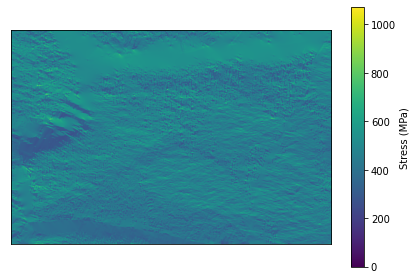

In [9]:
inc = 4
z_layer = 2
tensor_comp = (0, 0)
buff_size_xy = (4, 4)

map_slice = (
    inc, 
    slice(buff_size_xy[0], -buff_size_xy[0]), 
    slice(buff_size_xy[1], -buff_size_xy[1]), 
    z_layer
) + tensor_comp

plt.figure()
plt.imshow(stress[map_slice].T*1e-6)
plt.colorbar(label='Stress (MPa)')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig(r'stress.png')

# Plot strain map

In [10]:
strain = vol_elem_resp['field_data']['epsilon_U^2(F)']
print(strain['meta']['increments'])
strain = strain['data']
print(strain.shape)

[10, 20, 30, 40, 50]
(5, 1246, 836, 10, 3, 3)


In [11]:
'''alpha = (np.pi/ 180) * 45
beta = (np.pi/ 180) * 45

rotation_matrix = [np.cos(alpha), -np.sin(beta), 0], [ np.sin(alpha), np.cos(beta), 0],[ 0, 0, 1]


partly_rotated_strain = np.einsum('...ij,jk->...ik', strain, rotation_matrix)
rotated_strain = np.einsum('...ij,ik->...kj',partly_rotated_strain, rotation_matrix)'''

"alpha = (np.pi/ 180) * 45\nbeta = (np.pi/ 180) * 45\n\nrotation_matrix = [np.cos(alpha), -np.sin(beta), 0], [ np.sin(alpha), np.cos(beta), 0],[ 0, 0, 1]\n\n\npartly_rotated_strain = np.einsum('...ij,jk->...ik', strain, rotation_matrix)\nrotated_strain = np.einsum('...ij,ik->...kj',partly_rotated_strain, rotation_matrix)"

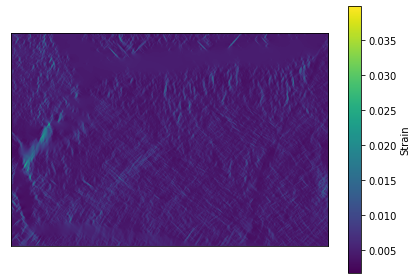

In [12]:

inc = 4
z_layer = 2
tensor_comp = (0, 0)
buff_size_xy = (4, 4)

map_slice = (
    inc, 
    slice(buff_size_xy[0], -buff_size_xy[0]), 
    slice(buff_size_xy[1], -buff_size_xy[1]), 
    z_layer
) + tensor_comp

plt.figure()
plt.imshow(strain[map_slice].T)
plt.colorbar(label='Strain')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
#plt.savefig(r'strain.png')

# Plot plastic strain map

In [13]:
plastic_strain = vol_elem_resp['field_data']['epsilon_U^2(F_p)']
print(plastic_strain['meta']['increments'])
plastic_strain = plastic_strain['data']
print(plastic_strain.shape)

[10, 20, 30, 40, 50]
(5, 1246, 836, 10, 3, 3)


In [14]:
'''alpha = (np.pi/ 180) * 45
beta = (np.pi/ 180) * 45

rotation_matrix = [np.cos(alpha), -np.sin(beta), 0], [ np.sin(alpha), np.cos(beta), 0],[ 0, 0, 1]


partly_rotated_plastic_strain = np.einsum('...ij,jk->...ik', plastic_strain, rotation_matrix)
rotated_plastic_strain = np.einsum('...ij,ik->...kj',partly_rotated_plastic_strain, rotation_matrix)'''

"alpha = (np.pi/ 180) * 45\nbeta = (np.pi/ 180) * 45\n\nrotation_matrix = [np.cos(alpha), -np.sin(beta), 0], [ np.sin(alpha), np.cos(beta), 0],[ 0, 0, 1]\n\n\npartly_rotated_plastic_strain = np.einsum('...ij,jk->...ik', plastic_strain, rotation_matrix)\nrotated_plastic_strain = np.einsum('...ij,ik->...kj',partly_rotated_plastic_strain, rotation_matrix)"

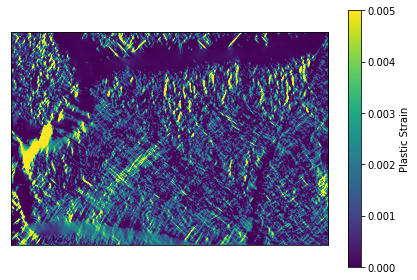

In [15]:
inc = 4
z_layer = 2
tensor_comp = (0, 0)
buff_size_xy = (4, 4)

map_slice = (
    inc, 
    slice(buff_size_xy[0], -buff_size_xy[0]), 
    slice(buff_size_xy[1], -buff_size_xy[1]), 
    z_layer
) + tensor_comp

plt.figure()
plt.imshow(plastic_strain[map_slice].T,vmin=0,vmax=0.005)
plt.colorbar(label='Plastic Strain')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
#plt.savefig(r'plastic_strain_hard.png')

In [16]:
def plot_profile(def_map,start_point,end_point):
    x0, y0  = start_point[0], start_point[1] # These are in _pixel_ coordinates!!
    x1, y1 = end_point[0], end_point[1]
    profile_length=np.sqrt((y1-y0)**2+(x1-x0)**2)
    num = np.round(int(profile_length))
    x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)

    # Extract the values along the line, using cubic interpolation
    zi = scipy.ndimage.map_coordinates(np.transpose(def_map), np.vstack((x,y)))
    plt.figure(figsize=(10,3))
    gs = gridspec.GridSpec(1, 2, height_ratios=[1]) 
    ax0=plt.subplot(gs[0])
    ax1=plt.subplot(gs[1])
    ax0.imshow(def_map,vmin=-0.00,vmax=0.005,interpolation='bilinear',cmap='viridis');
    ax0.plot([x0, x1], [y0, y1], 'rx-',lw=2);
    ax0.axis('image');
    ax1.plot(zi)
    ax1.axis('tight')

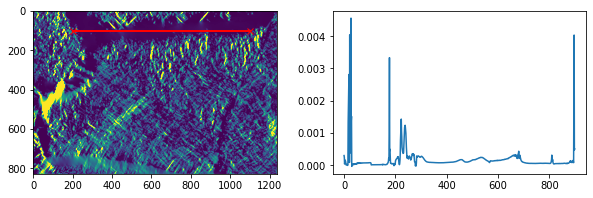

In [17]:
plot_profile(plastic_strain[map_slice].T,[200,100],[1100,100])
plt.savefig(r'plastic_strain_measurement_test.png')

# Shear on each slip system

In [3]:
shear = vol_elem_resp['field_data']['gamma_sl']
print(shear['meta']['increments'])
shear = shear['data']
print(shear.shape)

[10, 20, 30, 40, 50]
(5, 1246, 836, 10, 12)


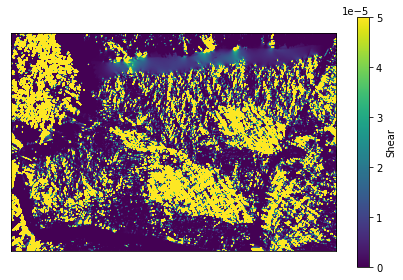

In [11]:
inc = 4
z_layer = 2
tensor_comp = (3,)
buff_size_xy = (4, 4)

map_slice = (
    inc, 
    slice(buff_size_xy[0], -buff_size_xy[0]), 
    slice(buff_size_xy[1], -buff_size_xy[1]), 
    z_layer
) + tensor_comp

#np.amax(shear[map_slice])

plt.figure()
plt.imshow(shear[map_slice].T,vmin=0,vmax=0.00005)
plt.colorbar(label='Shear')
plt.xticks([])
plt.yticks([])

plt.tight_layout()

(1238, 828, 12)


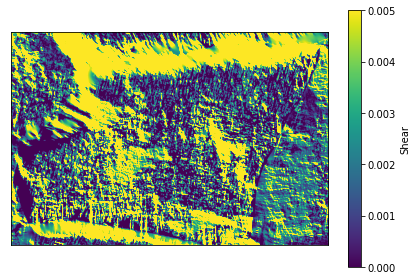

In [4]:
inc = 4
z_layer = 2
buff_size_xy = (4, 4)
map_slice = (
    inc, 
    slice(buff_size_xy[0], -buff_size_xy[0]), 
    slice(buff_size_xy[1], -buff_size_xy[1]), 
    z_layer
)
print(shear[map_slice].shape)  # should be 3 numbers (x, y, 12), check his 
max_shear = np.max(shear[map_slice], axis=2)
plt.figure()
plt.imshow(max_shear.T,vmin=0,vmax=0.005)
plt.colorbar(label='Shear')
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.savefig(r'shear_+45x.png')

In [17]:
map_slice

(4, slice(4, -4, None), slice(4, -4, None), 2)

In [19]:
print(shear[map_slice].shape)

(1238, 828, 12)


In [40]:
inc = 4
z_layer = 2
tensor_comp = (3,)
buff_size_xy = (4, 4)

map_slice = (
    inc, 
    slice(buff_size_xy[0], -buff_size_xy[0]), 
    slice(buff_size_xy[1], -buff_size_xy[1]), 
    z_layer
) + tensor_comp

apple = np.amax(shear[map_slice])

In [ ]:
#    '''plt.figure()
#    plt.imshow(shear[map_slice].T,vmin=0,vmax=0.0000005)
#    plt.colorbar(label='Shear')
#    plt.xticks([])
#    plt.yticks([])
#    plt.tight_layout()'''

(array([755968.,  18365.,  10099.,   7173.,   5689.,   4837.,   4266.,
          3818.,   3367.,   2977.]),
 array([0.0e+00, 2.0e-08, 4.0e-08, 6.0e-08, 8.0e-08, 1.0e-07, 1.2e-07,
        1.4e-07, 1.6e-07, 1.8e-07, 2.0e-07]),
 <BarContainer object of 10 artists>)

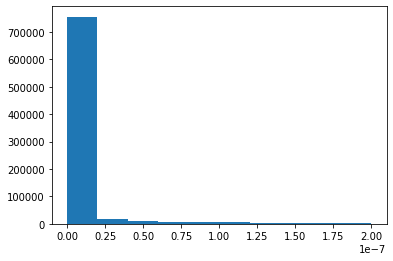

In [28]:
plt.hist(shear[map_slice].flatten(),range=(0,2e-7))

In [26]:
np.mean(shear[map_slice])

1.2871157912894252e-05

# Plot grain average stress

In [10]:
stress_grain = vol_elem_resp['grain_data']['sigma']
print(stress_grain['meta']['increments'])
stress_grain = stress_grain['data']
print(stress_grain.shape)

[10, 20, 30, 40, 50]
(5, 29270, 3, 3)


Text(0, 0.5, 'Normalised frequency')

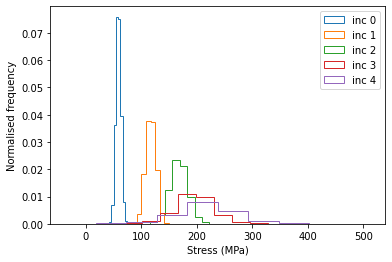

In [11]:
tensor_comp = (0, 0)

plt.figure()
for inc in range(5):
    # Remove last 2 grain of air and iso Ti
    data_slice = (inc, slice(None, -2)) + tensor_comp

    plt.hist(stress_grain[data_slice]*1e-6, histtype='step', density=True, label=f'inc {inc}')
    
plt.legend()
plt.xlabel('Stress (MPa)')
plt.ylabel('Normalised frequency')

# Plot grain average orientations

In [16]:
from defdap.quat import Quat

In [17]:
ori_grain = vol_elem_resp['grain_data']['O']
print(ori_grain['meta']['increments'])
ori_grain = ori_grain['data']['quaternions']
print(ori_grain.shape)

[10, 20, 30, 40, 50]
(5, 30110, 4)


In [18]:
# Swap to P=+1
ori_grain[:, :, 1:] *= -1
# Remove last 2 grain of air and iso Ti
ori_grain = ori_grain[:, :-2, :]

In [19]:
quat_grain = np.empty(ori_grain.shape[:-1], dtype=Quat)

for idx in np.ndindex(quat_grain.shape):
    quat_grain[idx] = Quat(ori_grain[idx])

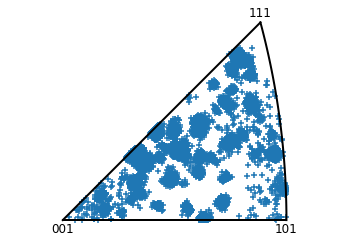

In [20]:

inc = 0
direction = np.array([1, 0, 0])

Quat.plotIPF(quat_grain[inc], direction, 'cubic')

In [21]:
vol_elem_resp['field_data'].keys()

dict_keys(['epsilon_U^2(F)', 'sigma', 'O', 'u_n', 'epsilon_U^2(F_p)'])

In [36]:
alpha = (np.pi/ 180) * 45
beta = (np.pi/ 180) * 45

rotation_matrix = [np.cos(alpha), -np.sin(beta), 0], [ np.sin(alpha), np.cos(beta), 0],[ 0, 0, 1]
rotation_matrix = np.matrix(rotation_matrix)
rotation_matrix

trasposed_rotation_matrix =rotation_matrix.transpose()
trasposed_rotation_matrix

matrix([[ 0.70710678,  0.70710678,  0.        ],
        [-0.70710678,  0.70710678,  0.        ],
        [ 0.        ,  0.        ,  1.        ]])

0.7853981633974483

In [15]:
a = np.matrix('1 2; 3 4')

In [16]:
a

matrix([[1, 2],
        [3, 4]])

In [25]:
sigma12 = -np.sin(beta)

In [30]:

profile_length=np.sqrt((150-83)**2+(72-64)**2)
num = np.round(int(profile_length))
x, y = np.linspace(72, 64, num), np.linspace(150, 83, num)

In [31]:
x, y

(array([72.        , 71.87878788, 71.75757576, 71.63636364, 71.51515152,
        71.39393939, 71.27272727, 71.15151515, 71.03030303, 70.90909091,
        70.78787879, 70.66666667, 70.54545455, 70.42424242, 70.3030303 ,
        70.18181818, 70.06060606, 69.93939394, 69.81818182, 69.6969697 ,
        69.57575758, 69.45454545, 69.33333333, 69.21212121, 69.09090909,
        68.96969697, 68.84848485, 68.72727273, 68.60606061, 68.48484848,
        68.36363636, 68.24242424, 68.12121212, 68.        , 67.87878788,
        67.75757576, 67.63636364, 67.51515152, 67.39393939, 67.27272727,
        67.15151515, 67.03030303, 66.90909091, 66.78787879, 66.66666667,
        66.54545455, 66.42424242, 66.3030303 , 66.18181818, 66.06060606,
        65.93939394, 65.81818182, 65.6969697 , 65.57575758, 65.45454545,
        65.33333333, 65.21212121, 65.09090909, 64.96969697, 64.84848485,
        64.72727273, 64.60606061, 64.48484848, 64.36363636, 64.24242424,
        64.12121212, 64.        ]),
 array([150.   

In [25]:
pat = (0,)

In [26]:
type(pat)

tuple

In [24]:
type(shear[map_slice].T)

numpy.ndarray